# Implementation of the YIN fundamental freq estimator

## import  the necessary modules

In [2]:
#import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.signal import fftconvolve
import librosa
import IPython.display as ipd

### Read the data (audio file) and extract a segment

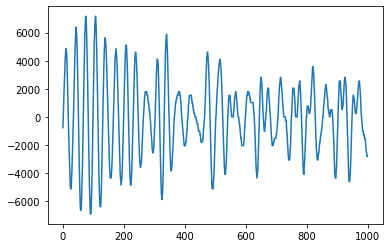

In [5]:
#import the audio file as datapoints
fs = 10000
from scipy.io import wavfile
[fs, audiodata] = wavfile.read('my_sound.wav')
audio_segment= audiodata[7000:8000]
audio_segment.shape
plt.plot(audio_segment)

# Step 1: Autocorrelate (librosa)
- similarity of a signal aganist the time shifted version of itself
$$\mathbf{r(k)} = \sum_{i=1}^W X(n)X(n-k)$$
- k = lag parameter
- r(k) is maximum at zero and sysmetrical at k


(0, 1000)

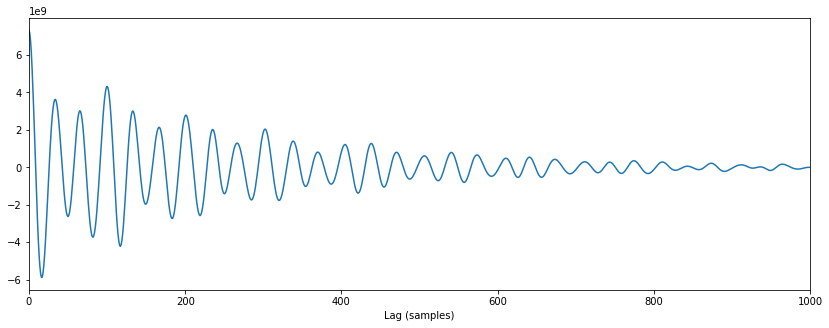

In [6]:
x = audio_segment
r = librosa.autocorrelate(x, max_size=1000)
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel('Lag (samples)')
plt.xlim(0, 1000)


## Step 2: The difference function 
- Better than the autocorrelation function because it is immune to amplitude change.
- It is the opposite of the autocorrelation (not always).
- it start with a zero so we have to go the next step to eliminate the zero dip
$${d_t(T)} = r_t(o) + r_t+_T(0) + 2\dot r_t(T)$$

(0, 1000)

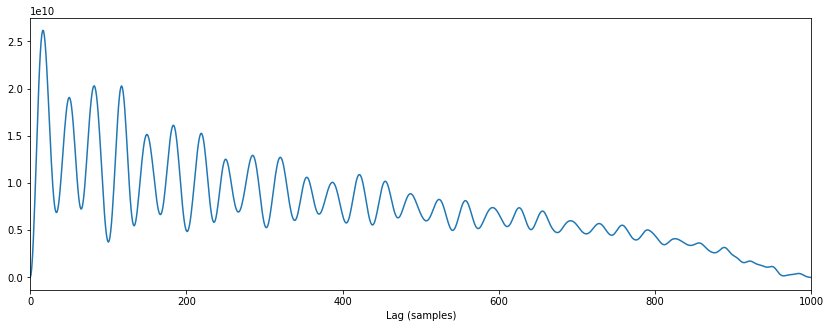

In [7]:
tau_max = r.shape[0]
x = np.array(x, np.float64)
w = x.size
x_cumsum = np.concatenate((np.array([0.]), (x * x).cumsum()))
size = w + tau_max
p2 = (size // 32).bit_length()
nice_numbers = (16, 18, 20, 24, 25, 27, 30, 32)
size_pad = min(x * 2 ** p2 for x in nice_numbers if x * 2 ** p2 >= size)
fc = np.fft.rfft(x, size_pad)
conv = np.fft.irfft(fc * fc.conjugate())[:tau_max]
diff = x_cumsum[w:w - tau_max:-1] + x_cumsum[w] - x_cumsum[:tau_max] - 2 * conv
plt.figure(figsize=(14, 5))
plt.plot(diff)
plt.xlabel('Lag (samples)')
plt.xlim(0, 1000)


## Step 3 : cumulative Mean Normalized Difference Function
- To eliminate the zero deep

(0, 1000)

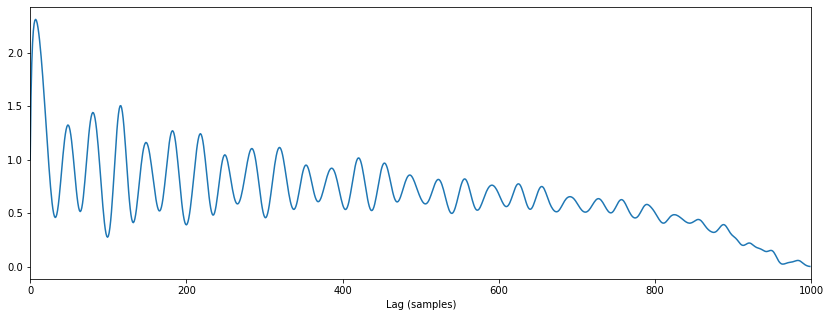

In [8]:
cmndf = diff[1:] * range(1, 1000) / np.cumsum(diff[1:]).astype(float)
plt.figure(figsize=(14, 5))
plt.plot(cmndf)
plt.xlabel('Lag (samples)')
plt.xlim(0, 1000)

## Step 4: Extracting the Fundamental frequency by using the threshold (0.1 or 0.15)

In [9]:
tau_min =50
tau_max = 800
harmo_th=0.5
def getPitch(cmndf, tau_min, tau_max, harmo_th):
    tau = tau_min
    while tau < tau_max:
        if cmndf[tau] < harmo_th:
            while tau + 1 < tau_max and cmndf[tau + 1] < cmndf[tau]:
                return tau
        tau += 1
    return 0 

In [10]:
getPitch(cmndf, tau_min, tau_max, harmo_th)

94